In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
results_dir = 'results'
all_experiments = {}

# loop through folders in results_dir
for folder in os.listdir(results_dir):
    folder_path = os.path.join(results_dir, folder)
    # loop through json files in the folder
    # ignore non-directory files
    if not os.path.isdir(folder_path):
        continue
    print (f'Processing folder: {folder}')
    all_experiments[folder] = []
    for file in os.listdir(folder_path):
        if file.endswith('.json'):
            file_path = os.path.join(folder_path, file)
            print(f'Processing file: {file_path}')

            with open(file_path, 'r') as f:
                data = json.load(f)
                # Assuming data is a list of dictionaries
                df = pd.DataFrame([data])
                all_experiments[folder].append(df)               # or save the plot using plt.savefig()

Processing folder: oneshot_fixed
Processing file: results\oneshot_fixed\evaluation_results_one-shot_llama-instruct.json
Processing file: results\oneshot_fixed\evaluation_results_one-shot_llama.json
Processing file: results\oneshot_fixed\evaluation_results_one-shot_menda.json
Processing file: results\oneshot_fixed\evaluation_results_one-shot_mistralai.json
Processing file: results\oneshot_fixed\evaluation_results_one-shot_phi-4.json
Processing file: results\oneshot_fixed\evaluation_results_one-shot_tinyllama.json
Processing folder: oneshot_flattened
Processing file: results\oneshot_flattened\evaluation_results_flattened_one-shot_llama-instruct.json
Processing file: results\oneshot_flattened\evaluation_results_flattened_one-shot_llama.json
Processing file: results\oneshot_flattened\evaluation_results_flattened_one-shot_menda.json
Processing file: results\oneshot_flattened\evaluation_results_flattened_one-shot_mistralai.json
Processing file: results\oneshot_flattened\evaluation_results_fl

In [3]:
all_experiments

{'oneshot_fixed': [       model_name  detection_accuracy  category_accuracy  class_accuracy  \
  0  llama-instruct            0.835714            0.12605        0.067227   
  
     avg_class_f1  detection_f1  category_f1  class_f1  
  0       0.11741      0.100977     0.071643  0.054356  ,
    model_name  detection_accuracy  category_accuracy  class_accuracy  \
  0      llama            0.116071           0.268908        0.008403   
  
     avg_class_f1  detection_f1  category_f1  class_f1  
  0      0.007752      0.031311     0.143316  0.003401  ,
    model_name  detection_accuracy  category_accuracy  class_accuracy  \
  0      menda            0.814286           0.176471        0.151261   
  
     avg_class_f1  detection_f1  category_f1  class_f1  
  0      0.133835      0.121127     0.095518  0.069258  ,
    model_name  detection_accuracy  category_accuracy  class_accuracy  \
  0  mistralai            0.069643           0.638655         0.05042   
  
     avg_class_f1  detection_f1 

<Figure size 1000x600 with 0 Axes>

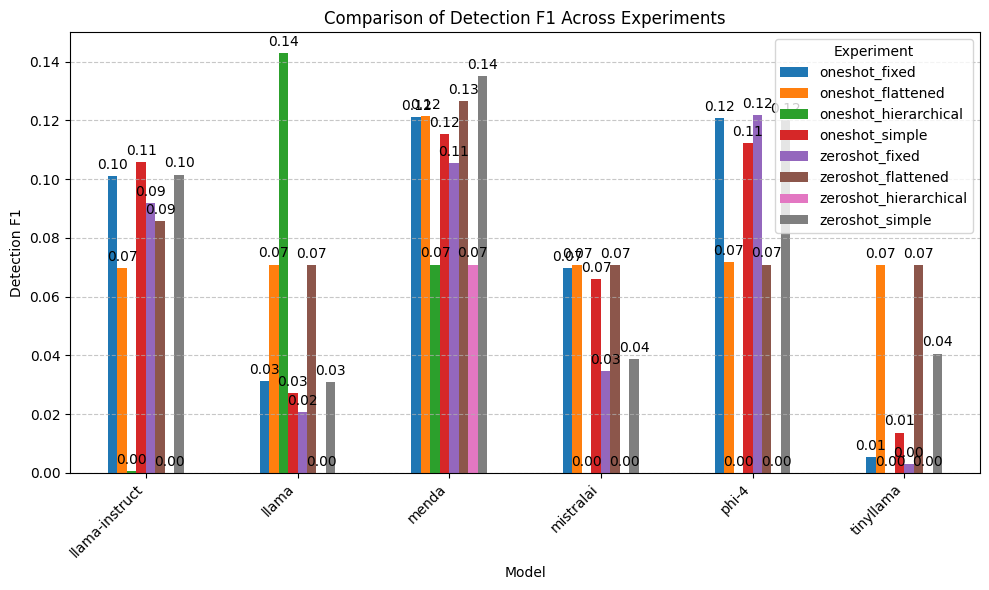

<Figure size 1000x600 with 0 Axes>

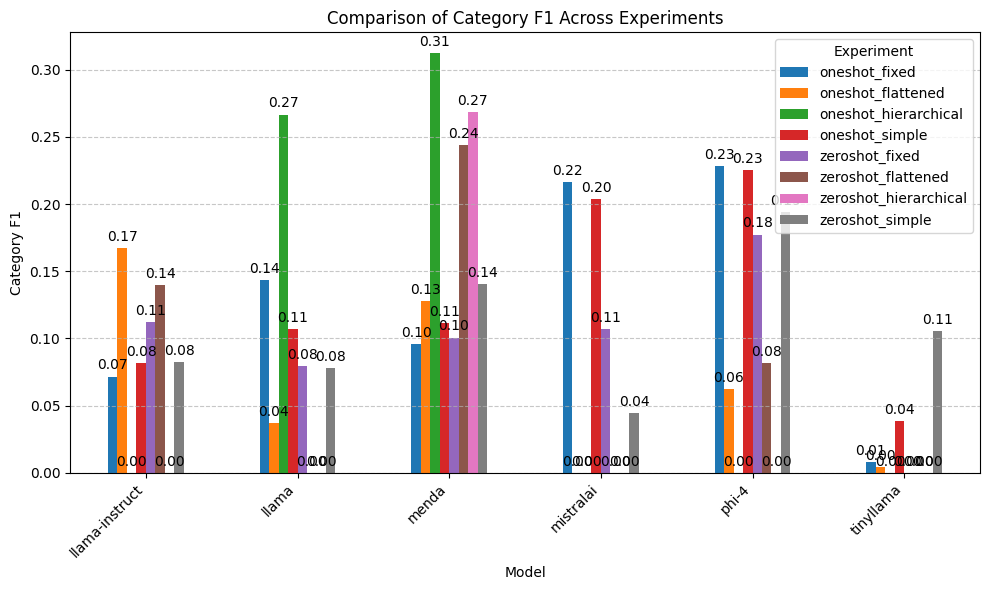

<Figure size 1000x600 with 0 Axes>

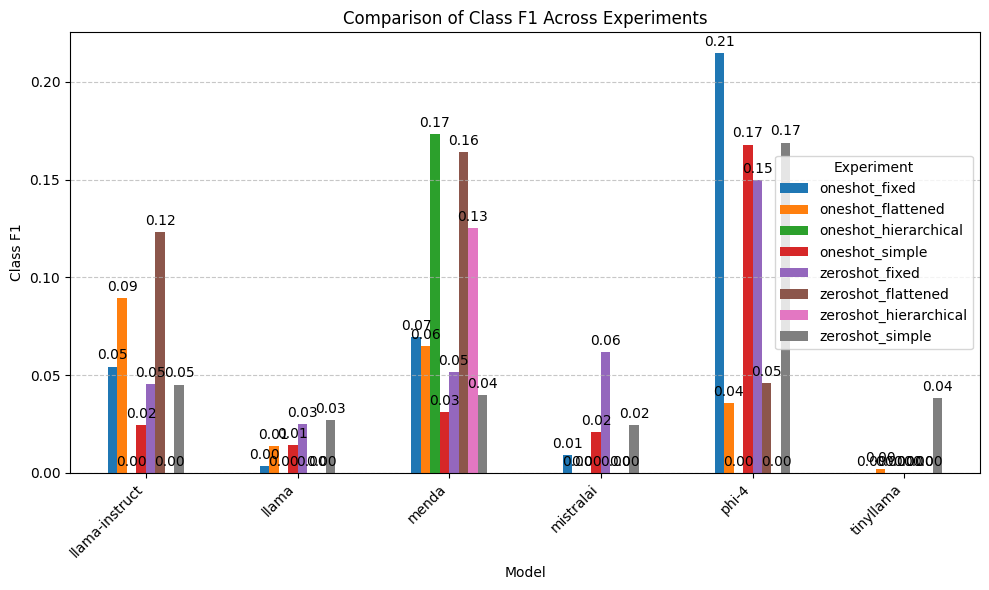

<Figure size 1000x600 with 0 Axes>

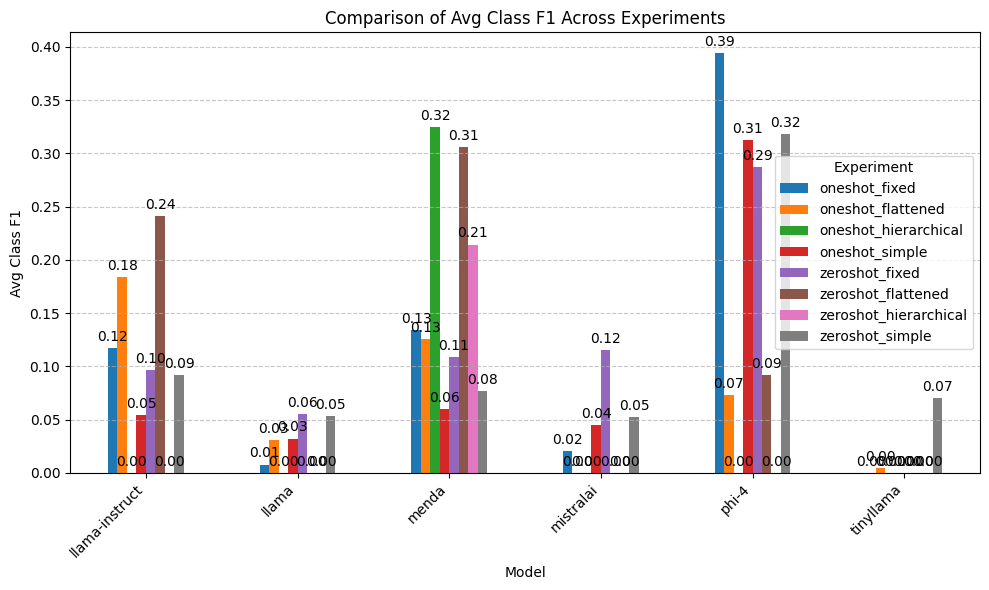

In [7]:
# Create a function to extract and organize the data for plotting
def create_comparison_df(all_experiments, metric):
    """
    Extract a specific metric from all experiments and organize it by model
    
    Parameters:
    all_experiments (dict): Dictionary of experiment results
    metric (str): The metric to compare (e.g., 'detection_accuracy')
    
    Returns:
    pd.DataFrame: DataFrame with models as rows and experiments as columns
    """
    comparison_data = {}
    
    for experiment_name, experiment_dfs in all_experiments.items():
        for df in experiment_dfs:
            model_name = df['model_name'].values[0]
            metric_value = df[metric].values[0]
            
            if model_name not in comparison_data:
                comparison_data[model_name] = {}
            
            comparison_data[model_name][experiment_name] = metric_value
    
    return pd.DataFrame.from_dict(comparison_data, orient='index')

# Define a function to plot the comparison
def plot_metric_comparison(all_experiments, metric, title=None, figsize=(10, 6)):
    """
    Plot a comparison of a specific metric across different experiments
    
    Parameters:
    all_experiments (dict): Dictionary of experiment results
    metric (str): The metric to compare (e.g., 'detection_accuracy')
    title (str, optional): Title for the plot
    figsize (tuple, optional): Figure size
    """
    comparison_df = create_comparison_df(all_experiments, metric)
    
    # Plot the data
    plt.figure(figsize=figsize)
    ax = comparison_df.plot(kind='bar', figsize=figsize)
    
    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel(metric.replace('_', ' ').title())
    
    if title:
        plt.title(title)
    else:
        plt.title(f'Comparison of {metric.replace("_", " ").title()} Across Experiments')
    
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Experiment')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)
    
    plt.tight_layout()
    return plt

# Example usage for detection accuracy
# metric_to_plot = 'detection_accuracy'
# plot = plot_metric_comparison(all_experiments, metric_to_plot)
# plt.show()

# You can also plot other metrics
metrics = ['detection_f1', 'category_f1', 'class_f1', 'avg_class_f1']
for metric in metrics:
    plot_metric_comparison(all_experiments, metric)
    # plt.savefig(f'{metric}_comparison.png')
    plt.show()

<Figure size 1200x600 with 0 Axes>

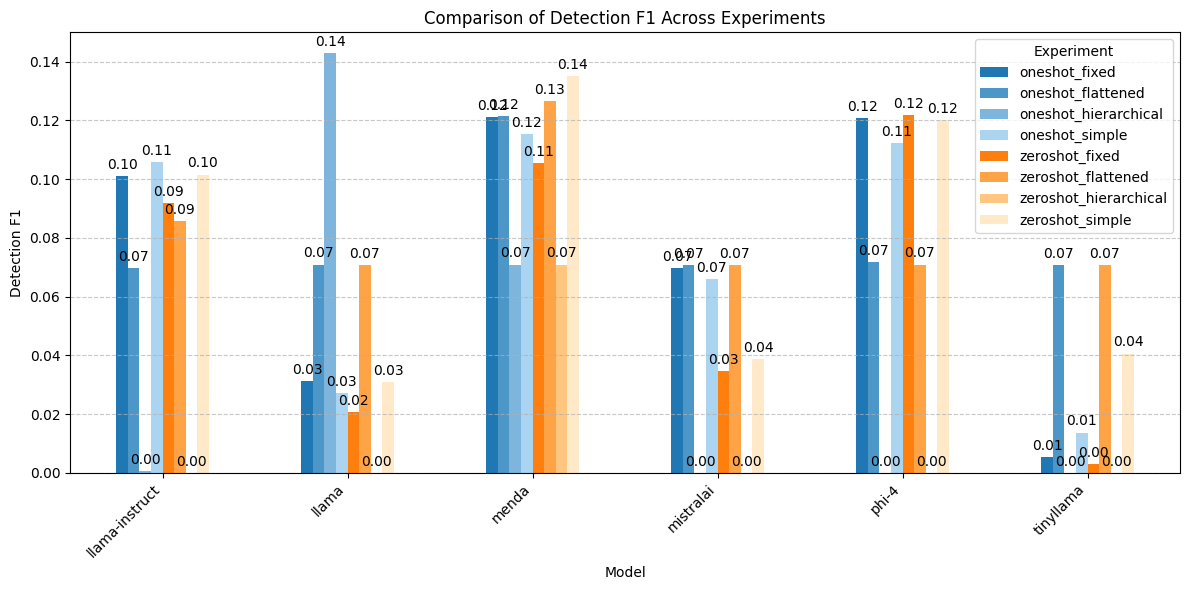

<Figure size 1200x600 with 0 Axes>

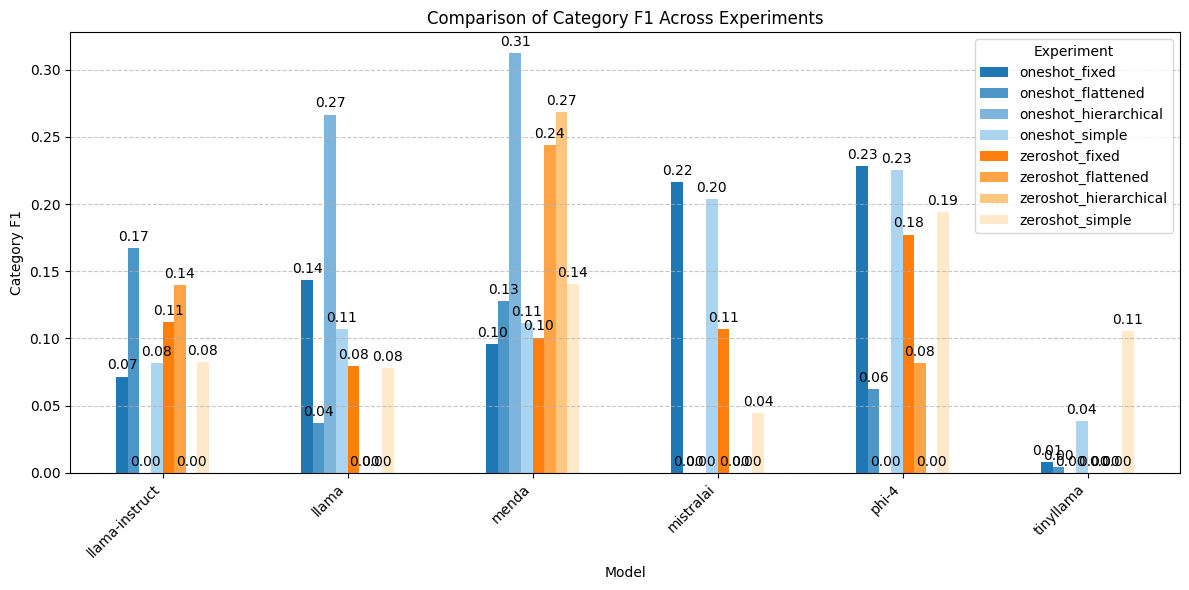

<Figure size 1200x600 with 0 Axes>

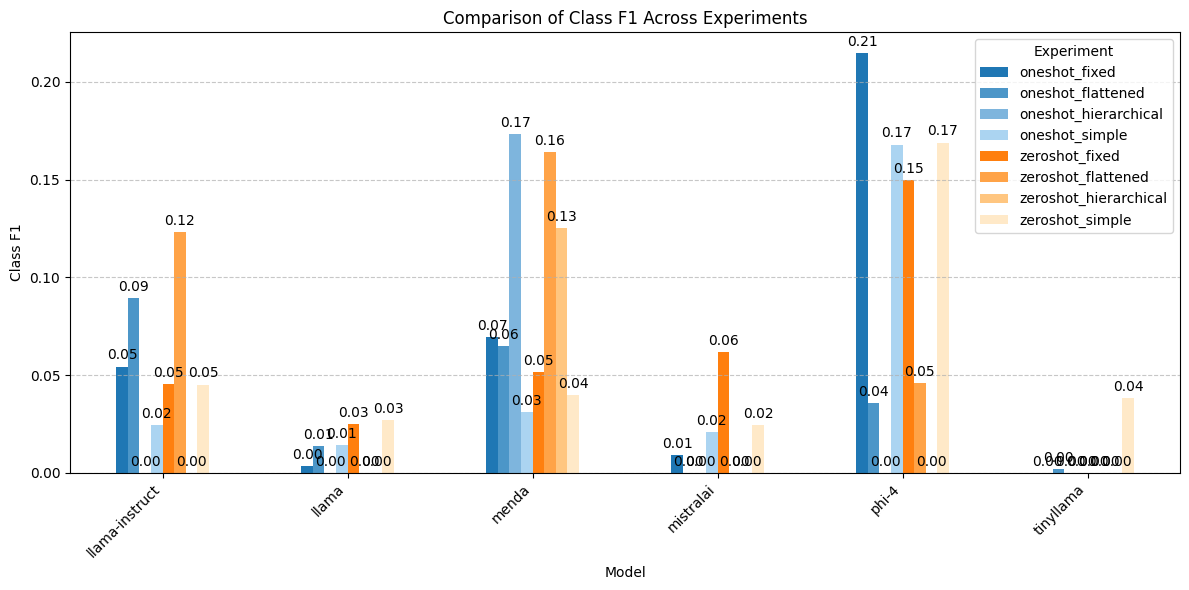

<Figure size 1200x600 with 0 Axes>

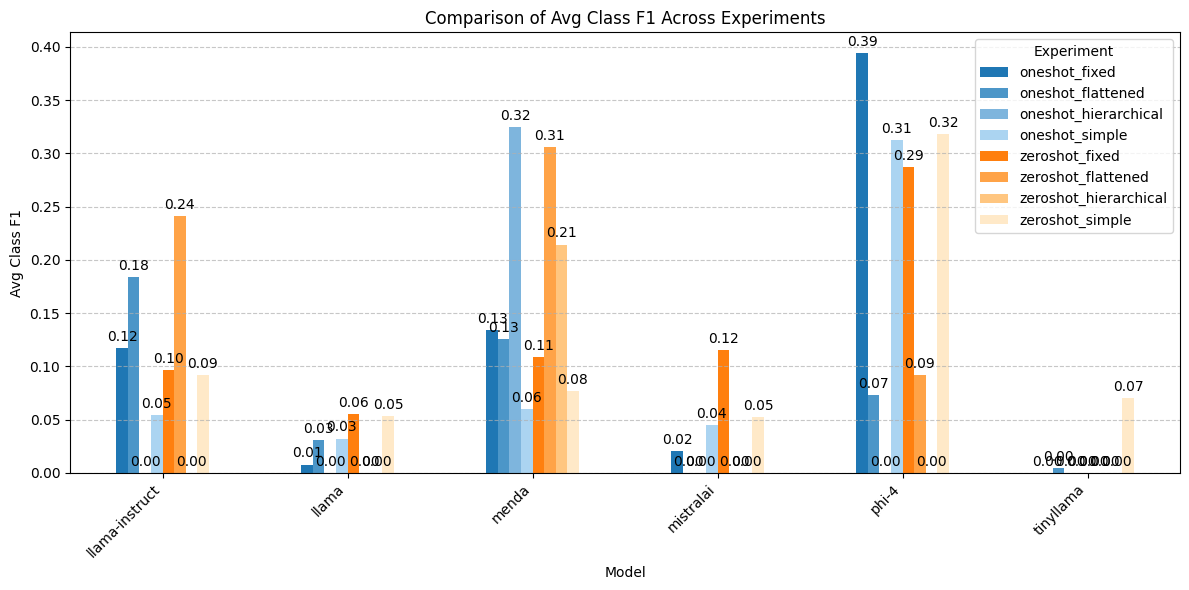

In [5]:
def plot_metric_comparison(all_experiments, metric, title=None, figsize=(12, 6)):
    """
    Plot a comparison of a specific metric across different experiments
    with oneshot and zeroshot bars grouped by similar colors
    """
    comparison_df = create_comparison_df(all_experiments, metric)
    
    # Reorder columns to group oneshot and zeroshot experiments together
    ordered_columns = sorted(comparison_df.columns, 
                            key=lambda x: ('1' if 'oneshot' in x else '2') + x)
    comparison_df = comparison_df[ordered_columns]
    
    # Create a custom color palette with different shades
    colors = []
    blue_shades = ['#1f77b4', '#4c96c8', '#7eb5dd', '#abd4f1']  # Different blues
    orange_shades = ['#ff7f0e', '#ffa347', '#ffc680', '#ffe9c8']  # Different oranges
    
    blue_idx = 0
    orange_idx = 0
    
    for col in ordered_columns:
        if 'oneshot' in col:
            colors.append(blue_shades[blue_idx % len(blue_shades)])
            blue_idx += 1
        else:  # zeroshot
            colors.append(orange_shades[orange_idx % len(orange_shades)])
            orange_idx += 1
    
    # Plot the data with custom colors
    plt.figure(figsize=figsize)
    ax = comparison_df.plot(kind='bar', figsize=figsize, color=colors)
    
    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel(metric.replace('_', ' ').title())
    
    if title:
        plt.title(title)
    else:
        plt.title(f'Comparison of {metric.replace("_", " ").title()} Across Experiments')
    
    plt.xticks(rotation=45, ha='right')
    
    # Use regular legend with all experiment names
    plt.legend(title='Experiment', loc='best')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)
    
    plt.tight_layout()
    return plt

# You can also plot other metrics
metrics = ['detection_f1', 'category_f1', 'class_f1', 'avg_class_f1']
for metric in metrics:
    plot_metric_comparison(all_experiments, metric)
    # plt.savefig(f'{metric}_comparison.png')
    plt.show()

<Figure size 1200x600 with 0 Axes>

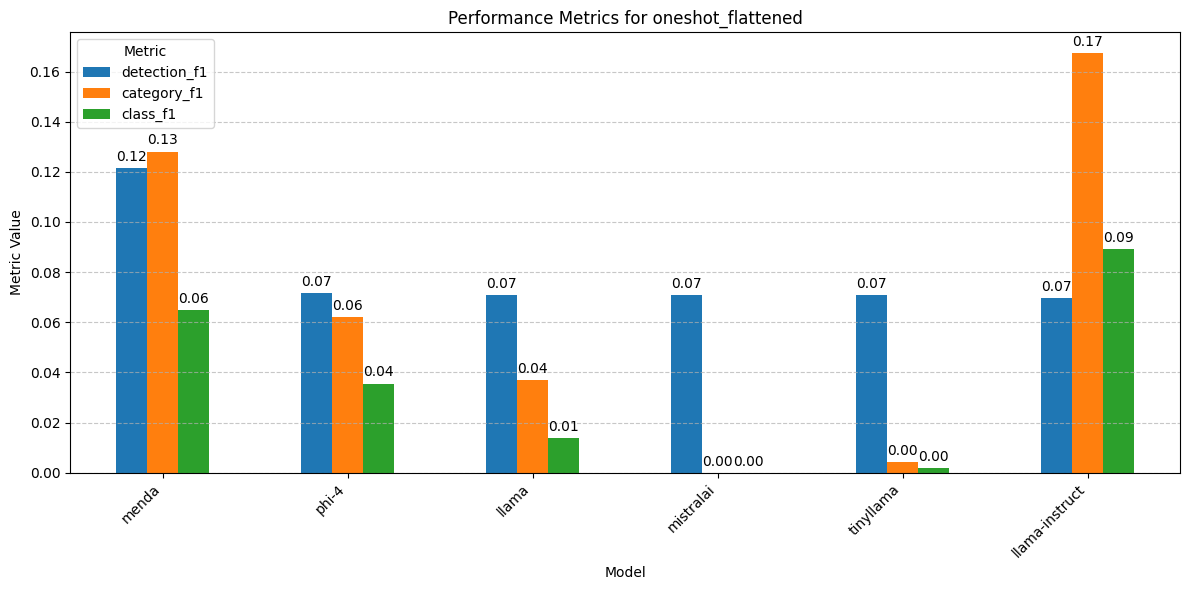

In [8]:
def plot_single_experiment_metrics(all_experiments, experiment_name, metrics=None, figsize=(12, 6)):
    """
    Plot multiple metrics for a single experiment type
    
    Parameters:
    all_experiments (dict): Dictionary of experiment results
    experiment_name (str): Name of the experiment to plot (e.g., 'oneshot_flattened')
    metrics (list, optional): List of metrics to plot. If None, uses default metrics
    figsize (tuple, optional): Figure size
    """
    if metrics is None:
        metrics = ['detection_accuracy', 'category_accuracy', 'class_accuracy', 'avg_class_f1']
    
    # Create data for the selected experiment
    experiment_data = {}
    if experiment_name in all_experiments:
        for df in all_experiments[experiment_name]:
            model_name = df['model_name'].values[0]
            model_data = {}
            for metric in metrics:
                if metric in df.columns:
                    model_data[metric] = df[metric].values[0]
            experiment_data[model_name] = model_data
    
    # Convert to DataFrame
    df = pd.DataFrame.from_dict(experiment_data, orient='index')
    
    # Sort by the first metric to get a reasonable order
    if not df.empty and metrics[0] in df.columns:
        df = df.sort_values(by=metrics[0], ascending=False)
    
    # Create plot
    plt.figure(figsize=figsize)
    ax = df.plot(kind='bar', figsize=figsize)
    
    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Metric Value')
    plt.title(f'Performance Metrics for {experiment_name}')
    
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metric')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)
    
    plt.tight_layout()
    return plt

# Example usage:
experiment_to_plot = 'oneshot_flattened'
plot_single_experiment_metrics(all_experiments, experiment_to_plot, metrics = ['detection_f1', 'category_f1', 'class_f1'])
plt.show()

# Or if you want to compare just specific metrics:
# custom_metrics = ['detection_accuracy', 'avg_class_f1']
# plot_single_experiment_metrics(all_experiments, experiment_to_plot, metrics=custom_metrics)
# plt.show()